# Basic Linear Regression Pipeline

In this project we will look at housing prices in six major cities in India. We will try to answer the following questions:

    * What factors have the biggest influence in prices in Indian megacities?
    * Do these factors vary in importance depending on the megacity?
    * Are these factors different in other world capitals?
    * How will Indian coastal cities' real estate values be affected by global warming?

OBTAIN THE DATA

In [1]:
# Let's get started by importing data analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from zlib import crc32 # This is for creating our test set

In [3]:
from pandas.plotting import scatter_matrix

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

In [5]:
import os

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

Download files and get sense of data

In [7]:
def load_housing_data(housing_path='C:/Users/harol/mypython/Applied Data Science/Project 2/'):
    csv_path = os.path.join(housing_path, "delhi.csv")
    return pd.read_csv(csv_path)

In [8]:
df_delhi = load_housing_data()

In [9]:
df_delhi.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
df_delhi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                4998 non-null   int64 
 1   Area                 4998 non-null   int64 
 2   Location             4998 non-null   object
 3   No. of Bedrooms      4998 non-null   int64 
 4   Resale               4998 non-null   int64 
 5   MaintenanceStaff     4998 non-null   int64 
 6   Gymnasium            4998 non-null   int64 
 7   SwimmingPool         4998 non-null   int64 
 8   LandscapedGardens    4998 non-null   int64 
 9   JoggingTrack         4998 non-null   int64 
 10  RainWaterHarvesting  4998 non-null   int64 
 11  IndoorGames          4998 non-null   int64 
 12  ShoppingMall         4998 non-null   int64 
 13  Intercom             4998 non-null   int64 
 14  SportsFacility       4998 non-null   int64 
 15  ATM                  4998 non-null   int64 
 16  ClubHo

In [11]:
df_delhi.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,4.998000e+03,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.588638e+07,1277.343737,2.657863,0.80012,5.423770,5.472589,5.415966,5.435574,5.412765,5.437975,...,5.655662,5.416367,5.456783,5.413165,5.394958,5.415566,5.408764,5.412965,5.394958,5.411565
std,4.612894e+07,915.217800,0.820605,0.39995,4.378355,4.322819,4.387116,4.365041,4.390702,4.362324,...,4.102704,4.386668,4.340938,4.390254,4.410549,4.387565,4.395176,4.390478,4.410549,4.392045
min,2.000000e+06,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+06,800.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+06,1000.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.580000e+07,1650.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


SCRUB THE DATA

In [12]:
# This is the iteration where I delete the non-numerical variables to see if it performs worse than one-hot encoding
del df_delhi['Location']

In [13]:
num_attributes = list(df_delhi)

In [14]:
num_attributes

['Price',
 'Area',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'IndoorGames',
 'ShoppingMall',
 'Intercom',
 'SportsFacility',
 'ATM',
 'ClubHouse',
 'School',
 '24X7Security',
 'PowerBackup',
 'CarParking',
 'StaffQuarter',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'WashingMachine',
 'Gasconnection',
 'AC',
 'Wifi',
 "Children'splayarea",
 'LiftAvailable',
 'BED',
 'VaastuCompliant',
 'Microwave',
 'GolfCourse',
 'TV',
 'DiningTable',
 'Sofa',
 'Wardrobe',
 'Refrigerator']

In [15]:
df_delhi['Refrigerator'].value_counts()

9    2996
0    1919
1      83
Name: Refrigerator, dtype: int64

Analyze the outliers and check for missing values

EXPLORE THE DATA

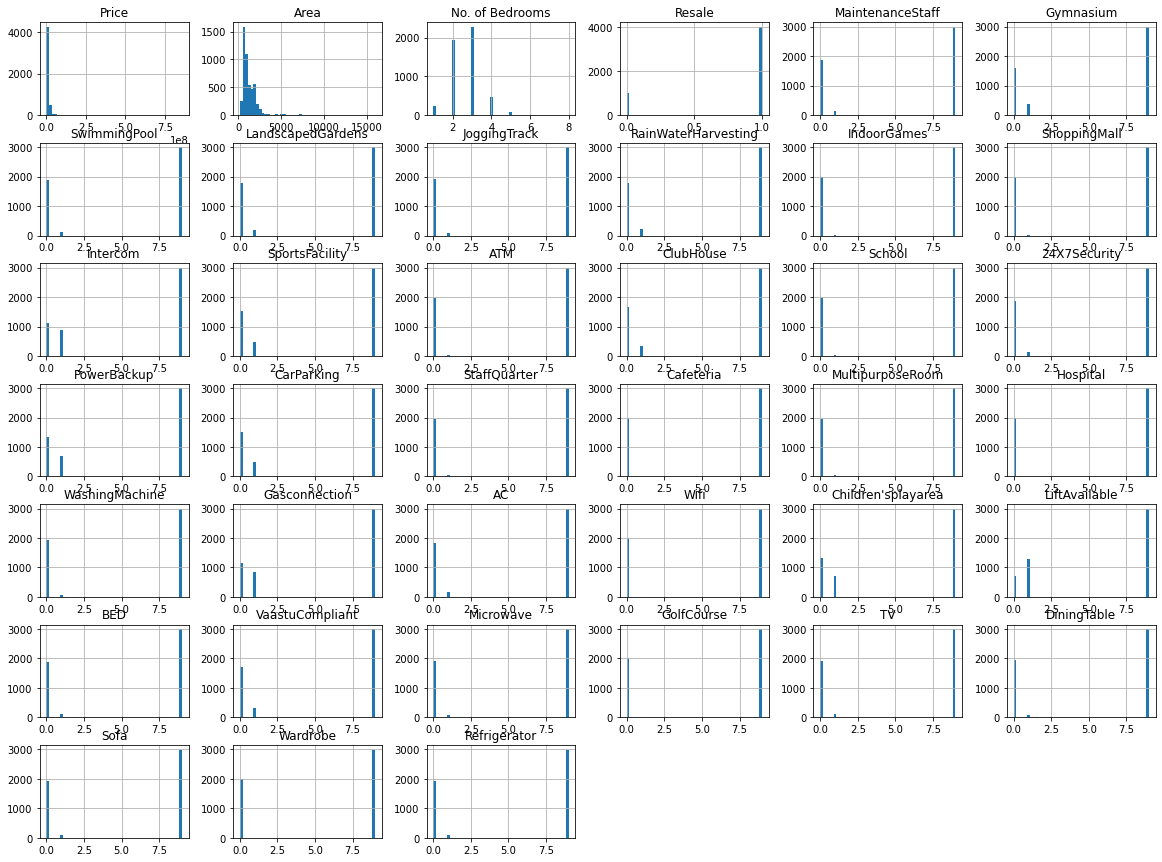

In [16]:
# Histograms are the best way to check for outliers
%matplotlib inline
df_delhi.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
df_delhi.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,4.998000e+03,4998.000000,4998.000000,4998.00000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,1.588638e+07,1277.343737,2.657863,0.80012,5.423770,5.472589,5.415966,5.435574,5.412765,5.437975,...,5.655662,5.416367,5.456783,5.413165,5.394958,5.415566,5.408764,5.412965,5.394958,5.411565
std,4.612894e+07,915.217800,0.820605,0.39995,4.378355,4.322819,4.387116,4.365041,4.390702,4.362324,...,4.102704,4.386668,4.340938,4.390254,4.410549,4.387565,4.395176,4.390478,4.410549,4.392045
min,2.000000e+06,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.900000e+06,800.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.500000e+06,1000.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.580000e+07,1650.000000,3.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,8.546000e+08,16000.000000,8.000000,1.00000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [18]:
df_delhi['MaintenanceStaff'].replace(9, 'NaN')

0         0
1         0
2         0
3         0
4         0
       ... 
4993    NaN
4994    NaN
4995    NaN
4996    NaN
4997    NaN
Name: MaintenanceStaff, Length: 4998, dtype: object

In [19]:
df_delhi.replace(9, 'NaN')

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,2,1,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,2,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2500000,540,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4994,3000000,540,2,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4995,2600000,415,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4996,5500000,415,1,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df_delhi2 = df_delhi[['Price', 'Area', 'No. of Bedrooms']]

Create the test set

MODEL THE DATA

In [21]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [22]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

In [24]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_delhi2, df_delhi2["No. of Bedrooms"]):
    strat_train_set = df_delhi2.loc[train_index]
    strat_test_set = df_delhi2.loc[test_index]

In [25]:
strat_test_set["No. of Bedrooms"].value_counts() / len(strat_test_set)

3    0.456
2    0.386
4    0.091
1    0.047
5    0.015
6    0.003
8    0.001
7    0.001
Name: No. of Bedrooms, dtype: float64

In [26]:
df_delhi2["No. of Bedrooms"].value_counts() / len(df_delhi2)

3    0.455582
2    0.386355
4    0.091437
1    0.047019
5    0.015006
6    0.002601
7    0.001000
8    0.001000
Name: No. of Bedrooms, dtype: float64

In [27]:
housing = strat_train_set.copy()

In [28]:
housing = strat_train_set.drop('Price', axis=1)

In [29]:
housing_labels = strat_train_set["Price"].copy()

In [30]:
housing.head()

,Area,No. of Bedrooms
2770,1200,3
2094,2700,2
3098,2645,3
1155,900,3
1497,700,2


Build the Transformation Pipeline with SciKit Learn

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [32]:
ordinal_encoder = OrdinalEncoder()

In [33]:
housing_cat = housing[["No. of Bedrooms"]]

In [34]:
housing_cat.head()

,No. of Bedrooms
2770,3
2094,2
3098,3
1155,3
1497,2


In [35]:
from sklearn.compose import ColumnTransformer

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [37]:
num_pipeline = StandardScaler()

In [38]:
num_pipeline.fit_transform(housing)

array([[-0.07669681,  0.41758916],
       [ 1.56408006, -0.8019298 ],
       [ 1.50391824,  0.41758916],
       ...,
       [-0.40485219,  0.41758916],
       [ 0.52492138,  0.41758916],
       [-0.45954475,  0.41758916]])

In [39]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [40]:
from sklearn.compose import ColumnTransformer

In [41]:
num_attribs = ['Area']
cat_attribs = ["No. of Bedrooms"]

In [42]:
num_attribs

['Area']

In [43]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", ordinal_encoder, cat_attribs),
    ])

In [44]:
housing_prepared = full_pipeline.fit_transform(housing)

In [45]:
housing_prepared2 = full_pipeline.fit_transform(strat_test_set)

In [46]:
housing_labels.head()

2770    42500000
2094     2600000
3098    50000000
1155     5350000
1497     3500000
Name: Price, dtype: int64

Check for correlation

In [47]:
corr_matrix = df_delhi2.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price              1.000000
Area               0.396761
No. of Bedrooms    0.198578
Name: Price, dtype: float64

array([[<AxesSubplot:xlabel='Price', ylabel='Price'>,
        <AxesSubplot:xlabel='Area', ylabel='Price'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>],
       [<AxesSubplot:xlabel='Price', ylabel='Area'>,
        <AxesSubplot:xlabel='Area', ylabel='Area'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='Area'>],
       [<AxesSubplot:xlabel='Price', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='Area', ylabel='No. of Bedrooms'>,
        <AxesSubplot:xlabel='No. of Bedrooms', ylabel='No. of Bedrooms'>]],
      dtype=object)

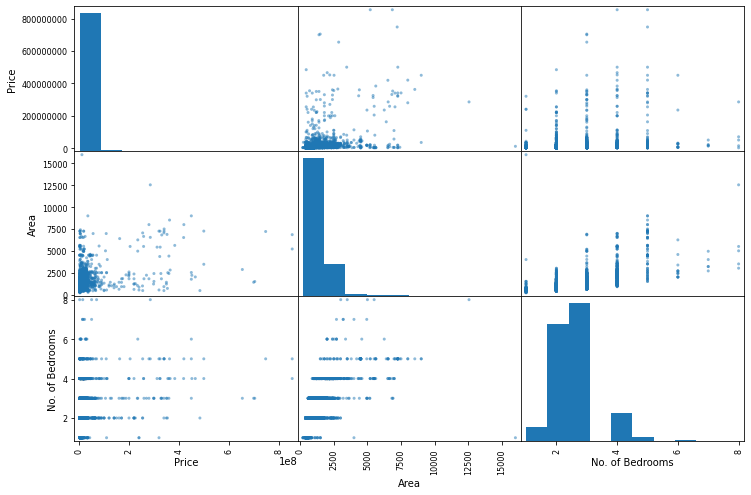

In [48]:
attributes = ["Price", "Area", "No. of Bedrooms"]
scatter_matrix(df_delhi2[attributes], figsize=(12, 8))

Fix and encode any non-numerical categories

Train and evaluate the training set

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

Test the trained model on subset

In [51]:
some_data = housing.iloc[:5]

In [52]:
some_labels = housing_labels.iloc[:5]

In [53]:
print("Predictions:", lin_reg.predict(some_data))

Predictions: [2.28065175e+10 5.13056458e+10 5.02570220e+10 1.71074509e+10
 1.33118680e+10]


In [54]:
print("Labels:", list(some_labels))

Labels: [42500000, 2600000, 50000000, 5350000, 3500000]


In [55]:
# Here is where I change tack to a plainer regression model
df_delhi2.head()

,Price,Area,No. of Bedrooms
0,10500000,1200,2
1,6000000,1000,3
2,15000000,1350,2
3,2500000,435,2
4,5800000,900,3


In [56]:
df_delhi3 = df_delhi2[['Area','No. of Bedrooms']]

In [57]:
df_delhi4 = df_delhi2[['Price']]

In [58]:
df_delhi4.head()

,Price
0,10500000
1,6000000
2,15000000
3,2500000
4,5800000


In [59]:
lin_reg = LinearRegression()
lin_reg.fit(df_delhi3, df_delhi4)

LinearRegression()

In [60]:
some_data = df_delhi3.iloc[:5]

In [61]:
# These results look much better
print("Predictions:", lin_reg.predict(some_data))

Predictions: [[17248505.86417281]
 [ 7979434.2130705 ]
 [20648664.44577809]
 [  -92302.90201416]
 [ 5712661.82533364]]


In [62]:
some_labels = df_delhi4.iloc[:5]

In [63]:
print("Labels:", (some_labels))

Labels:       Price
0  10500000
1   6000000
2  15000000
3   2500000
4   5800000


In [64]:
from sklearn.svm import LinearSVR

In [65]:
svm_reg = LinearSVR(epsilon=1.5)

In [66]:
svm_reg.fit(housing_prepared, housing_labels)

LinearSVR(epsilon=1.5)

In [67]:
some_data = housing.iloc[:5]

In [68]:
housing[:5]

,Area,No. of Bedrooms
2770,1200,3
2094,2700,2
3098,2645,3
1155,900,3
1497,700,2


In [69]:
strat_test_set[:5]

,Price,Area,No. of Bedrooms
436,4700000,900,3
395,4500000,900,2
3660,2100000,1647,2
18,3600000,1050,3
4611,21900000,1400,2


In [70]:
some_labels = strat_test_set.iloc[:5]

In [71]:
print("Predictions:", svm_reg.predict(some_data))

Predictions: [23879. 17252. 23879. 23879. 17252.]


In [77]:
print("Predictions:", svm_reg.predict(some_labels[['Area','No. of Bedrooms']]))

Predictions: [23879. 17252. 17252. 23879. 17252.]


In [78]:
some_labels['Price']

436      4700000
395      4500000
3660     2100000
18       3600000
4611    21900000
Name: Price, dtype: int64

In [73]:
some_data

,Area,No. of Bedrooms
2770,1200,3
2094,2700,2
3098,2645,3
1155,900,3
1497,700,2


In [74]:
some_labels

,Price,Area,No. of Bedrooms
436,4700000,900,3
395,4500000,900,2
3660,2100000,1647,2
18,3600000,1050,3
4611,21900000,1400,2


In [ ]:
num_pipeline.fit_transform(strat_test_set)

In [ ]:
housing_prepared[:5]

In [ ]:
housing_prepared2[:5]

In [ ]:
housing_cat = strat_test_set[["No. of Bedrooms"]]

In [ ]:
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", ordinal_encoder, cat_attribs),
    ])

In [ ]:
housing_prepared2 = full_pipeline.fit_transform(strat_test_set)

In [ ]:
print("Labels:", (some_labels))

In [ ]:
some_data = strat_test_set.iloc[:5]

In [ ]:
print("Predictions:", svm_reg.predict(some_data))

Measure the model

Run a decision tree regressor if the RMSE is underfitted

Run a random forest of the decision tree model doesn't work well